# import libraries

In [1]:
from transformers import BertTokenizer, BertModel,RobertaModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import ast

c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Read Clean Data

In [2]:
folder_path = "../ParcaliSonuc"

csv_files = [file for file in os.listdir(folder_path) if file.startswith('df') and file.endswith('coordinatesspecialaddress.csv')]

dataframes = []
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,Date,Tweet,lower,content_ment_link,content_wo_punct,content_wo_removed_english,content_wo_normalize,content_wo_tokenize,content_wo_stop,content_wo_lemmatized,content_no_rare_words,content_wo_tokenize_capitalize,location,location_unique,id,formatted_address,latitude,longitude
0,08.02.2023,@haluklevent\n @oguzhanugur\n hepinizden alla...,@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...,hepinizden allah razı olsun iyiki varsınız deprem,hepinizden allah razı olsun iyi ki varsınız de...,"['hepinizden', 'allah', 'razı', 'olsun', 'iyi'...","['hepinizden', 'razı', 'varsınız', 'deprem']","['hep', 'razı', 'var', 'deprem']","['hep', 'razı', 'var', 'deprem']",Hepinizden Allah Razı Olsun Iyi Ki Varsınız De...,NaN,NaN,0,NaN,NaN,NaN
1,08.02.2023,allah ın cezası.sen nasıl bir vicdansız mahlu...,allah ın cezası.sen nasıl bir vicdansız mahlu...,allah ın cezası.sen nasıl bir vicdansız mahlu...,allah ın cezasısen nasıl bir vicdansız mahluk...,allah ın cezasısen nasıl bir vicdansız mahluka...,allahın cezasisen nasıl bir vicdansız mahlukat...,"['allahın', 'cezasisen', 'nasıl', 'bir', 'vicd...","['allahın', 'cezasisen', 'vicdansız', 'mahluka...","['allah', 'cezasisen', 'vicdan', 'mahlukat', '...","['allah', 'cezasisen', 'vicdan', 'mahlukat', '...",Allahın Cezasisen Nasıl Bir Vicdansız Mahlukat...,Maraş Hatay,Maraş Hatay,1,Maraş Hatay,36.414285,36.271928
2,08.02.2023,koskaca bir aile enkaz altındaymış\n\nkucukdal...,koskaca bir aile enkaz altındaymış\n\nkucukdal...,koskaca bir aile enkaz altındaymış\n\nkucukdal...,koskaca bir aile enkaz altındaymış kucukdalya...,koskaca bir enkaz altındaymış kucukdalyan maha...,koskaca bir enkaz altındaymış küçükdalyan maha...,"['koskaca', 'bir', 'enkaz', 'altındaymış', 'kü...","['koskaca', 'enkaz', 'altındaymış', 'küçükdaly...","['koska', 'enkaz', 'alt', 'küçükdalyan', 'maha...","['koska', 'enkaz', 'alt', 'küçükdalyan', 'maha...",Koskaca Bir Enkaz Altındaymış Küçükdalyan Maha...,Küçükdalyan Mahallesi Emir Sokak Subaşı Apartmanı,Küçükdalyan Mahallesi Emir Sokak Subaşı Apartmanı,2,"Küçükdalyan, Emir Sk., 31120 Antakya/Hatay, Tü...",36.218095,36.171243
3,08.02.2023,ülkeyi yıkıp gidecekler dedikleri buymuş! yıkt...,ülkeyi yıkıp gidecekler dedikleri buymuş! yıkt...,ülkeyi yıkıp gidecekler dedikleri buymuş! yıkt...,ülkeyi yıkıp gidecekler dedikleri buymuş yıktı...,ülkeyi yıkıp gidecekler dedikleri buymuş yıktı...,ülkeyi yıkıp gidecekler dedikleri buymuş yıktı...,"['ülkeyi', 'yıkıp', 'gidecekler', 'dedikleri',...","['ülkeyi', 'yıkıp', 'gidecekler', 'dedikleri',...","['ülke', 'yık', 'gid', 'de', 'buy', 'yık', 'ül...","['ülke', 'yık', 'gid', 'de', 'buy', 'yık', 'ül...",Ülkeyi Yıkıp Gidecekler Dedikleri Buymuş Yıktı...,NaN,NaN,3,NaN,NaN,NaN
4,07.02.2023,önemli̇ duyuru \n@depremdairesi\n @afadbaskanl...,önemli̇ duyuru \n@depremdairesi\n @afadbaskanl...,önemli̇ duyuru \n\n \n _dernegi\n \n \n #adiya...,önemli̇ duyuru dernegi adiyaman depr...,önemli̇ duyuru dernegi adiyaman deprem hatayya...,önemli duyuru derneği adıyaman deprem hatayyar...,"['önemli', 'duyuru', 'derneği', 'adıyaman', 'd...","['önemli', 'duyuru', 'derneği', 'adıyaman', 'd...","['önem', 'duyuru', 'derneğ', 'adıyaman', 'depr...","['önem', 'duyuru', 'derneğ', 'adıyaman', 'depr...",Önemli Duyuru Derneği Adıyaman Deprem Hatayyar...,Adıyaman,Adıyaman,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844815,10.02.2023,"i̇nandiğiniz di̇n bu deği̇l. okuyun, araştirin...","i̇nandiğiniz di̇n bu deği̇l. okuyun, araştirin...","i̇nandiğiniz di̇n bu deği̇l. okuyun, araştirin...",i̇nandiğiniz di̇n bu deği̇l okuyun araştirin ö...,i̇nandiğiniz di̇n deği̇l okuyun araştirin öğre...,inandığınız din değil okuyun araştırın öğrenin...,"['inandığınız', 'din', 'değil', 'okuyun', 'ara...","['inandığınız', 'din', 'okuyun', 'araştırın', ...","['inan', 'din', 'oku', 'araştır', 'öğren', 'af...","['inan', 'din', 'oku', 'araştır', 'öğren', 'af...",Inandığınız Di

# 5000 Sample Get Data

In [3]:
sampled_df = combined_df.sample(n=5000, random_state=42)
texts = sampled_df['content_no_rare_words']
texts

426369    ['acil', 'şekil', 'twin', 'yap', 'yay', 'arkad...
104657    ['cebrail', 'sokağ', 'fatih', 'cadde', 'nato',...
495433    ['insan', 'nasib', 'al', 'böyle', 'felaket', '...
469166    ['şehit', 'ali', 'hacı', 'cami', 'insan', 'aç'...
743886    ['maalesef', 'hafta', 'at', 'iç', 'dokun', 'bü...
                                ...                        
736611    ['hayat', 'kaybed', 'vatandaş', 'tanrı', 'rahm...
436323                                 ['giresun', 'salla']
314215    ['hatayantakya', 'ekin', 'mahalle', 'inönü', '...
63954     ['büyük', 'deprem', 'afad', 'yetiş', 'göçük', ...
8913      ['arkadaş', 'ara', 'konu', 'yakın', 'market', ...
Name: content_no_rare_words, Length: 5000, dtype: object

In [4]:
sampled_df['text'] = sampled_df['content_no_rare_words'].apply(lambda x: ' '.join(eval(x)))


In [5]:
sampled_df['text'] 

426369                acil şekil twin yap yay arkadaş ol de
104657    cebrail sokağ fatih cadde nato sokak şenay apa...
495433    insan nasib al böyle felaket orta saldırı meşr...
469166    şehit ali hacı cami insan aç susuz bekl yar ed...
743886        maalesef hafta at iç dokun büyük deprem üzgün
                                ...                        
736611    hayat kaybed vatandaş tanrı rahmet yara acil ş...
436323                                        giresun salla
314215    hatayantakya ekin mahalle inönü bulvar buket a...
63954         büyük deprem afad yetiş göçük alt yard çağrıl
8913      arkadaş ara konu yakın market ara hacı oğl num...
Name: text, Length: 5000, dtype: object

In [6]:
vectorizer = TfidfVectorizer(max_features=5000)  # En fazla 5000 özelliği dikkate alıyoruz
X = vectorizer.fit_transform(sampled_df['text'])

In [7]:
pca = PCA(n_components=2)  # 2 boyuta indiriyoruz
X_reduced = pca.fit_transform(X.toarray())

### KMEANS Clustering

In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_reduced)

C:\Users\Enes\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Enes\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=4, random_state=42)

In [9]:
sampled_df['cluster'] = kmeans.labels_

In [10]:
sampled_df['cluster']

426369    3
104657    2
495433    0
469166    1
743886    0
         ..
736611    0
436323    0
314215    2
63954     0
8913      2
Name: cluster, Length: 5000, dtype: int32

In [11]:
print(sampled_df['cluster'].value_counts())

cluster
0    2814
2    1333
1     605
3     248
Name: count, dtype: int64


### Visualize Clustering

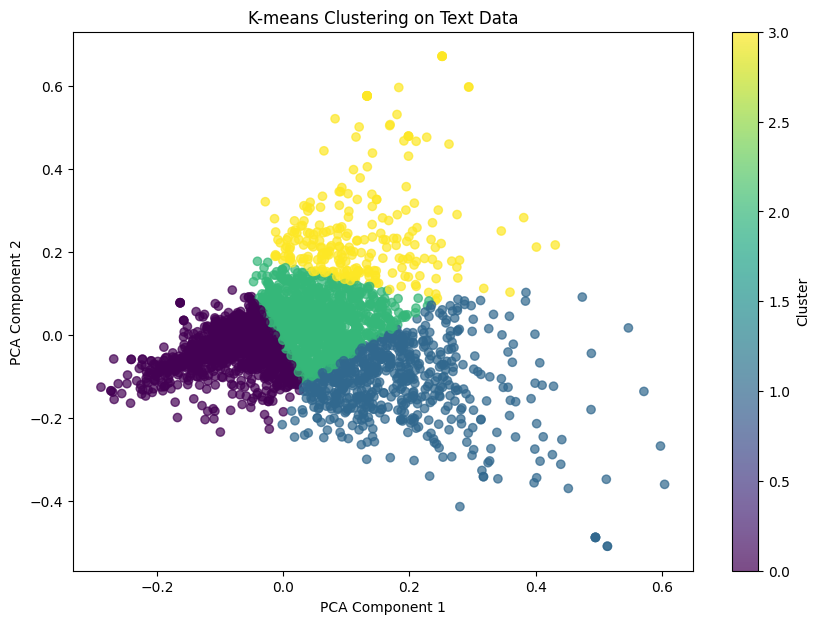

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title("K-means Clustering on Text Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [13]:
sampled_df

,Date,Tweet,lower,content_ment_link,content_wo_punct,content_wo_removed_english,content_wo_normalize,content_wo_tokenize,content_wo_stop,content_wo_lemmatized,content_no_rare_words,content_wo_tokenize_capitalize,location,location_unique,id,formatted_address,latitude,longitude,text,cluster
426369,06.02.2023,acil bir sekilde twitleri rt yaparak yayalım a...,acil bir sekilde twitleri rt yaparak yayalım a...,acil bir sekilde twitleri rt yaparak yayalım a...,acil bir sekilde twitleri rt yaparak yayalım a...,acil bir sekilde twitleri rt yaparak yayalım a...,acil bir şekilde Twin'leri rt yaparak yayalım ...,"['acil', 'bir', 'şekilde', ""Twin'leri"", 'rt', ...","['acil', 'şekilde', ""Twin'leri"", 'yaparak', 'y...","['acil', 'şekil', 'twin', 'yap', 'yay', 'arkad...","['acil', 'şekil', 'twin', 'yap', 'yay', 'arkad...",Acil Bir Şekilde Twin'leri Rt Yaparak Yayalım ...,NaN,NaN,3842,NaN,NaN,NaN,acil şekil twin yap yay arkadaş ol de,3
104657,06.02.2023,cebrail sokağı fatih caddesi nato sokak benay ...,cebrail sokağı fatih caddesi nato sokak benay ...,cebrail sokağı fatih caddesi nato sokak benay ...,cebrail sokağı fatih caddesi nato sokak benay ...,cebrail sokağı fatih caddesi nato sokak benay ...,cebrail sokağı fatih caddesi nato sokak Şenay ...,"['cebrail', 'sokağı', 'fatih', 'caddesi', 'nat...","['cebrail', 'sokağı', 'fatih', 'caddesi', 'nat...","['cebrail', 'sokağ', 'fatih', 'cadde', 'nato',...","['cebrail', 'sokağ', 'fatih', 'cadde', 'nato',...",Cebrail Sokağı Fatih Caddesi Nato Sokak Şenay ...,Cebrail Sokağı Fatih Caddesi Nato Sokak Şenay ...,Cebrail Sokağı Fatih Caddesi Nato Sokak Şenay ...,20144,"Fatih Cd. & Nato Sk., Cebrail, 31030 Antakya/H...",36.206802,36.157049,cebrail sokağ fatih cadde nato sokak şenay apa...,2
495433,07.02.2023,i̇nsanlıktan nasibini alamamış tam da böyl...,i̇nsanlıktan nasibini alamamış tam da böyl...,i̇nsanlıktan nasibini alamamış tam da böyl...,i̇nsanlıktan nasibini alamamış tam da böyl...,i̇nsanlıktan nasibini alamamış böylesi bir fel...,insanlıktan nasibini alamamış böylesi bir fela...,"['insanlıktan', 'nasibini', 'alamamış', 'böyle...","['insanlıktan', 'nasibini', 'alamamış', 'böyle...","['insan', 'nasib', 'al', 'böyle', 'felaket', '...","['insan', 'nasib', 'al', 'böyle', 'felaket', '...",Insanlıktan Nasibini Alamamış Böylesi Bir Fela...,NaN,NaN,30639,NaN,NaN,NaN,insan nasib al böyle felaket orta saldırı meşr...,0
469166,06.02.2023,şehit polis ali hacı caminde insanlar aç...,şehit polis ali hacı caminde insanlar aç...,şehit polis ali hacı caminde insanlar aç...,şehit polis ali hacı caminde insanlar aç...,şehit ali hacı caminde insanlar aç susuz bekli...,şehit ali hacı caminde insanlar aç susuz bekli...,"['şehit', 'ali', 'hacı', 'caminde', 'insanlar'...","['şehit', 'ali', 'hacı', 'caminde', 'insanlar'...","['şehit', 'ali', 'hacı', 'cami', 'insan', 'aç'...","['şehit', 'ali', 'hacı', 'cami', 'insan', 'aç'...",Şehit Ali Hacı Caminde Insanlar Aç Susuz Bekli...,Şahinbey Gaziantep,Şahinbey Gaziantep,4372,Şahinbey Gaziantep,37.062832,37.379262,şehit ali hacı cami insan aç susuz bekl yar ed...,1
743886,07.02.2023,malesef 2 hafta önce attığım twit i̇çime dokun...,malesef 2 hafta önce attığım twit i̇çime dokun...,malesef 2 hafta önce attığım twit i̇çime dokun...,malesef hafta önce attığım twit i̇çime dokunm...,malesef hafta önce attığım i̇çime dokunmuştu s...,maalesef hafta önce attığım içime dokunmuştu s...,"['maalesef', 'hafta', 'önce', 'attığım', 'içim...","['maalesef', 'hafta', 'attığım', 'içime', 'dok...","['maalesef', 'hafta', 'at', 'iç', 'dokun', 'bü...","['maalesef', 'hafta', 'at', 'iç', 'dokun', 'bü...",Maalesef Hafta Önce Attığım Içime Dokunmuştu S...,NaN,NaN,25616,NaN,NaN,NaN,maalesef hafta at iç dokun büyük deprem üzgün,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736611,06.02.2023,de hayatını kaybeden vatandaşlarımıza ulu tan...,de hayatını kaybeden vatandaşlarımıza ulu tan...,de hayatını kaybeden vatandaşlarımıza ulu tan...,de hayatını kaybeden vatandaşlarımıza

In [14]:
print(sampled_df[['text', 'cluster']].head(20))  # İlk 20 satırı göster

                                                     text  cluster
426369              acil şekil twin yap yay arkadaş ol de        3
104657  cebrail sokağ fatih cadde nato sokak şenay apa...        2
495433  insan nasib al böyle felaket orta saldırı meşr...        0
469166  şehit ali hacı cami insan aç susuz bekl yar ed...        1
743886      maalesef hafta at iç dokun büyük deprem üzgün        0
253588  bilerek maraş hatay adıyaman antep il yay yap ...        0
836825                             yay mi kimse haber yok        3
793265  arkadaş yar koli koy gönder ist moped kasa ind...        2
431788  hatayantakya kötü durum arkadaş zor haberleş y...        1
308481  talaytepe kompleksidiyarbakır camiikürsünlü ca...        0
59640   kahramanmaraş türkoğlu çiftçioğlu apartman blo...        3
732401                                deprem şiddet büyük        0
296073             anlık ihbar paylaşım grub katılım bekl        0
559724  merhaba adıyaman gölbaş şekil yar gel bina yık...     

### Sample Texts Clustering Result

In [16]:
for cluster_id in sampled_df['cluster'].unique():
    print(f"\nCluster {cluster_id} - Örnek Metinler:")
    example_texts = sampled_df[sampled_df['cluster'] == cluster_id]['text'].head(10)  # Her kümeden 5 örnek
    for text in example_texts:
        print(f"- {text}")


Cluster 3 - Örnek Metinler:
- acil şekil twin yap yay arkadaş ol de
- yay mi kimse haber yok
- kahramanmaraş türkoğlu çiftçioğlu apartman blok enkaz alt insan yay
- yay
- hatay akaryakıt konu gurup bahsed yay
- depremzede destek bulun otel konakla tesis liste aşağı link hızlı elden ele yay arkadaş
- adıyaman yardım git haber al arkadaş yay şekil ulaş bulun saat haber al duyur
- adıyaman enkaz alt haber alın
- şükr kanat mahalle fevzi paşa cadde eyvah anne kız enkaz alt hatay yay
- yakın arkadaş ulaş yay mi

Cluster 2 - Örnek Metinler:
- cebrail sokağ fatih cadde nato sokak şenay apartman antakya hatayenkaz alt kal insan var
- arkadaş yar koli koy gönder ist moped kasa indirim gir indirim yararlan aynı bütçe al
- merhaba adıyaman gölbaş şekil yar gel bina yık yolla patla durum şekil gölbaş konuş paylaş duy artık
- betil mahalle gözcü toplu konut site arsuzhatay
- türk millet allah kendi güven yara sar duyarlı ol kızılay bağış afet acil yar insani yar kurum maddi manevi destek ol
- alın

### Clustering Label Convert 

In [22]:
cluster_labels = {
    3: "Çok Acil",
    0: "Bilgilendirme",
    2: "Destek",
    1: "Acil"
}
sampled_df['final_label'] = sampled_df['cluster'].map(cluster_labels)
print(sampled_df[['text', 'cluster', 'final_label']].head(10))

                                                     text  cluster  \
426369              acil şekil twin yap yay arkadaş ol de        3   
104657  cebrail sokağ fatih cadde nato sokak şenay apa...        2   
495433  insan nasib al böyle felaket orta saldırı meşr...        0   
469166  şehit ali hacı cami insan aç susuz bekl yar ed...        1   
743886      maalesef hafta at iç dokun büyük deprem üzgün        0   
253588  bilerek maraş hatay adıyaman antep il yay yap ...        0   
836825                             yay mi kimse haber yok        3   
793265  arkadaş yar koli koy gönder ist moped kasa ind...        2   
431788  hatayantakya kötü durum arkadaş zor haberleş y...        1   
308481  talaytepe kompleksidiyarbakır camiikürsünlü ca...        0   

          final_label  
426369       Çok Acil  
104657         Destek  
495433  Bilgilendirme  
469166           Acil  
743886  Bilgilendirme  
253588  Bilgilendirme  
836825       Çok Acil  
793265         Destek  
431788       

### Save Clustering Result

In [23]:
sampled_df.to_csv("../results/clustered_data.csv", index=False)

# Cosine Similarity Example

## How Does [CLS] Work in BERT?
## Tokenization: Suppose we have a simple sentence like:
## “The sky is clear and blue.”
## 2. Before processing, BERT adds [CLS] and [SEP] to the sentence:

## [CLS] The sky is clear and blue. [SEP]
## 3. Then, BERT tokenizes the words, converting them into a format it can process — typically embeddings, which are vector representations of each token in a multi-dimensional space.

## Embedding Through Transformer Layers: Each token in this sequence, including [CLS], is passed through BERT’s transformer layers. These layers use attention mechanisms to allow each token to “attend” to every other token in the sequence. As this happens, each token's ## vector representation is updated to capture richer and more complex relationships.
## Role of [CLS]: Since the [CLS] token is the first position in the sequence, it captures a summary representation of the entire sentence (or sentences) after passing through all the transformer layers. This means that the final vector representation of [CLS] contains ## the context of the whole sentence, making it highly useful for classification tasks or tasks requiring sentence-level understanding.

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy() # [CLS] token: [CLS] at the start, signaling the beginning and “summary” position of the sentence.
    return embeddings

text1 = "Deprem bölgelerinde acil yardım gerekiyor. Herkes yardım etmeli"
text2 = "Tatilimde plajda denize girdim ve güneşlendim."

embedding1 = get_bert_embeddings(text1)
embedding2 = get_bert_embeddings(text2)

similarity = cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity: {similarity[0][0]:.4f}")

c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Cosine Similarity: 0.8782


# Sentence Transformers Embedding

In [ ]:
model = SentenceTransformer('paraphrase-MPNet-base-v2')

text1 = "Deprem bölgelerinde acil yardım gerekiyor. Herkes yardım etmeli"
text2 = "Tatilimde plajda denize girdim ve güneşlendim."

embedding1 = model.encode(text1)
embedding2 = model.encode(text2)

# Cosine Similarity hesaplama
similarity = cosine_similarity([embedding1], [embedding2])
print(f"Cosine Similarity: {similarity[0][0]:.4f}")

c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Cosine Similarity: 0.4315


# Sentence Transformers Optimize

In [ ]:
models = [
    'all-MiniLM-L6-v2',
    'paraphrase-MiniLM-L6-v2',
    'paraphrase-distilroberta-base-v1',
    'distilbert-base-nli-stsb-mean-tokens',
    'roberta-large-nli-stsb-mean-tokens',
    'paraphrase-xlm-r-multilingual-v1',
    'paraphrase-albert-small-v2',
    'distilroberta-base-paraphrase-v1',
    'bert-base-nli-mean-tokens',
    'bert-large-nli-mean-tokens',
    'roberta-base-nli-stsb-mean-tokens',
    'xlm-r-large-en-fr',
    'xlm-r-base-en',
    'paraphrase-mpnet-base-v2',
    'paraphrase-distilbert-base-v1',
    'paraphrase-albert-large-v2',
    'paraphrase-xlm-r-mlm-v1',
    'sentence-transformers/bert-base-nli-cls-token',
]

In [ ]:
text1 = "Deprem bölgelerinde acil yardım gerekiyor. Herkes yardım etmeli"
text2 = "Tatilimde plajda denize girdim ve güneşlendim."

In [ ]:
for model_name in models:
    model = SentenceTransformer(model_name)

    embedding1 = model.encode(text1)
    embedding2 = model.encode(text2)

    similarity = cosine_similarity([embedding1], [embedding2])[0][0]
    print(f"Model: {model_name}, Cosine Similarity: {similarity:.4f}")


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Model: all-MiniLM-L6-v2, Cosine Similarity: 0.3602


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--paraphrase-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenization_

Model: paraphrase-MiniLM-L6-v2, Cosine Similarity: 0.2004


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--paraphrase-distilroberta-base-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\toke

Model: paraphrase-distilroberta-base-v1, Cosine Similarity: 0.4915


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--distilbert-base-nli-stsb-mean-tokens. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\

Model: distilbert-base-nli-stsb-mean-tokens, Cosine Similarity: 0.5729


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--roberta-large-nli-stsb-mean-tokens. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\to

Model: roberta-large-nli-stsb-mean-tokens, Cosine Similarity: 0.7782


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--paraphrase-xlm-r-multilingual-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\toke

Model: paraphrase-xlm-r-multilingual-v1, Cosine Similarity: 0.0890


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--paraphrase-albert-small-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenizati

Model: paraphrase-albert-small-v2, Cosine Similarity: 0.3653


c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Enes\.cache\huggingface\hub\models--sentence-transformers--distilroberta-base-paraphrase-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


AttributeError: add_special_tokens conflicts with the method add_special_tokens in RobertaTokenizerFast

## Select Model And Test

In [ ]:
labels = {
    "acil": "acil durum, hızlı yardım gerekiyor, bina hasarı, kurtarma, tehlike, yaralı, ağır yaralı, hasar, enkaz altında, yardım bekliyor, yardım çağrısı",
    "çok acil": "çok acil, hemen müdahale, can kaybı riski, yaşam tehlikesi, felaket, kurtarma, ağır yaralı",
    "bilgilendirme": "bilgilendirme, duyuru, açıklama, uyarı, haber, afet bilgilendirmesi, deprem hakkında bilgi",
    "destek": "destek, yardım talepleri, bağış, gıda, barınma, su, tıbbi yardım, psikolojik destek, yardım kampanyası"
}

In [ ]:
model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')

c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
def get_closest_label(text):
    text_embedding = model.encode(text)
    label_embeddings = {label: model.encode(rep) for label, rep in labels.items()}
    similarities = {label: cosine_similarity([text_embedding], [embedding])[0][0] for label, embedding in label_embeddings.items()}
    sorted_labels = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_labels

In [ ]:
example_text = "Deprem sonrası büyük bir yardım organizasyonu yapmamız gerekiyor, insanlar yardım bekliyor."
result = get_closest_label(example_text)
print("Cümleye en yakın etiketler:")
for label, sim in result:
    print(f"{label}: {sim:.4f}")

Cümleye en yakın etiketler:
acil: 0.6225
çok acil: 0.4960
destek: 0.4303
bilgilendirme: 0.4202


# Calculate

In [ ]:
labels = {
    "acil": "deprem,acil durum, hızlı yardım gerekiyor, bina hasarı, kurtarma, tehlike, yaralı, ağır yaralı, hasar, enkaz altında, yardım bekliyor, yardım çağrısı",
    "çok acil": "çok acil, hemen müdahale, can kaybı riski, yaşam tehlikesi, felaket, kurtarma, ağır yaralı",
    "bilgilendirme": "bilgilendirme, duyuru, açıklama, uyarı, haber, afet bilgilendirmesi, bilgi, uyarı",
    "destek": "destek, bağış, gıda, barınma, su, tıbbi yardım, psikolojik destek, yardım kampanyası"
}
label_embeddings = {label: model.encode(rep) for label, rep in labels.items()}

In [ ]:
def get_closest_label(text_tokens):
    text = " ".join(text_tokens)
    text_embedding = model.encode(text)
    similarities = {label: cosine_similarity([text_embedding], [embedding])[0][0] for label, embedding in label_embeddings.items()}
    sorted_labels = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_labels

for index, row in df.iterrows():
    text_tokens = row["content_no_rare_words"]
    closest_labels = get_closest_label(text_tokens)
    df.loc[index, "label_cosine_similarity"] = closest_labels[0][0]

print(df.head())

                               content_no_rare_words predicted_label  \
0                   ['hep', 'razı', 'var', 'deprem']          destek   
1             ['o', 'dayan', 'güc', 'ver', 'deprem']          destek   
2  ['adıyaman', 'ali', 'taşı', 'mahalle', 'sokak'...          destek   
3                                         ['deprem']          destek   
4  ['arkadaş', 'ulaş', 'kahramanmaraş', 'elbistan...          destek   

  label_cosinus_similarity label_cosine_similarity  
0                   destek                  destek  
1                   destek           bilgilendirme  
2                   destek           bilgilendirme  
3                   destek           bilgilendirme  
4                   destek                  destek  


## K Means

In [ ]:
def get_embeddings_from_tokens(tokens):
    sentence = " ".join(tokens)
    return model.encode([sentence])[0]

In [ ]:
text_embeddings = np.array([get_embeddings_from_tokens(tokens) for tokens in df['content_no_rare_words']])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(text_embeddings)
df['cluster_label'] = kmeans.labels_
print(df)

                                  content_no_rare_words predicted_label  \
0                      ['hep', 'razı', 'var', 'deprem']          destek   
1                ['o', 'dayan', 'güc', 'ver', 'deprem']          destek   
2     ['adıyaman', 'ali', 'taşı', 'mahalle', 'sokak'...          destek   
3                                            ['deprem']          destek   
4     ['arkadaş', 'ulaş', 'kahramanmaraş', 'elbistan...          destek   
...                                                 ...             ...   
1990  ['kader', 'gün', 'ada', 'hatay', 'deprem', 'de...             NaN   
1991  ['tanı', 'şeref', 'öğretmen', 'içinde', 'güzel...             NaN   
1992  ['mesaj', 'alın', 'mahalle', 'yol', 'site', 'b...             NaN   
1993  ['ülke', 'deprem', 'konu', 'anlat', '“', '”', ...             NaN   
1994  ['bebek', 'yardımcı', 'enkaz', 'alt', 'gör', '...             NaN   

     label_cosinus_similarity label_cosine_similarity  cluster_label  
0                      deste

C:\Users\Enes\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


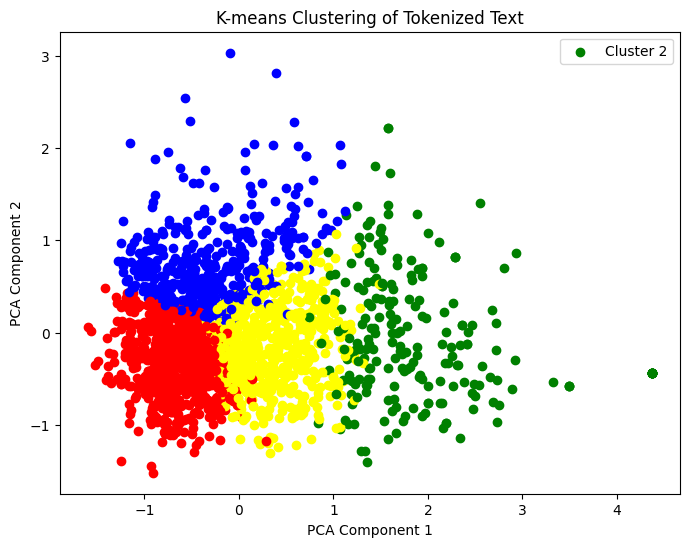

In [ ]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(text_embeddings)
colors = ['red', 'blue', 'green','yellow']

# Matplotlib ile görselleştirme
plt.figure(figsize=(8, 6))
for i in range(len(df)):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1],
                color=colors[df.loc[i, 'cluster_label']],
                label=f"Cluster {df.loc[i, 'cluster_label']}" if i == 0 else "")

plt.title("K-means Clustering of Tokenized Text")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Küme etiketlerini göster
plt.legend()
plt.show()

In [ ]:
df

,content_no_rare_words,label_cosine_similarity,cluster_label
0,"['hep', 'razı', 'var', 'deprem']",destek,2
1,"['o', 'dayan', 'güc', 'ver', 'deprem']",bilgilendirme,3
2,"['adıyaman', 'ali', 'taşı', 'mahalle', 'sokak'...",bilgilendirme,0
3,['deprem'],bilgilendirme,2
4,"['arkadaş', 'ulaş', 'kahramanmaraş', 'elbistan...",destek,3
...,...,...,...
1990,"['kader', 'gün', 'ada', 'hatay', 'deprem', 'de...",bilgilendirme,3
1991,"['tanı', 'şeref', 'öğretmen', 'içinde', 'güzel...",bilgilendirme,3
1992,"['mesaj', 'alın', 'mahalle', 'yol', 'site', 'b...",bilgilendirme,0
1993,"['ülke', 'deprem', 'konu', 'anlat', '“', '”', ...",bilgilendirme,3


In [ ]:
def label_clusters(cluster_label):
    if cluster_label == 0:
        return 'çok acil'
    elif cluster_label == 1:
        return 'acil'
    elif cluster_label == 2:
        return 'Bilgilendirme'
    elif cluster_label == 3:
        return 'destek'

df['label'] = df['cluster_label'].apply(label_clusters)


In [ ]:
df.to_csv('tweets_with_labels.csv', index=False)

# Embedding

In [ ]:
def get_bert_embeddings_from_tokens(tokens):
    inputs = tokenizer(tokens, is_split_into_words=True, return_tensors='pt', padding=True, truncation=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)

    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()

    return embeddings

In [ ]:
labels = {
    "acil": "deprem,acil durum, hızlı yardım gerekiyor, bina hasarı, kurtarma, tehlike, yaralı, ağır yaralı, hasar, enkaz altında, yardım bekliyor, yardım çağrısı",
    "çok acil": "çok acil, hemen müdahale, can kaybı riski, yaşam tehlikesi, felaket, kurtarma, ağır yaralı",
    "bilgilendirme": "bilgilendirme, duyuru, açıklama, uyarı, haber, afet bilgilendirmesi, bilgi, uyarı",
    "destek": "destek, bağış, gıda, barınma, su, tıbbi yardım, psikolojik destek, yardım kampanyası"
}
label_embeddings = {label: get_bert_embeddings_from_tokens(text.split()) for label, text in labels.items()}

NameError: name 'get_bert_embeddings_from_tokens' is not defined

In [ ]:
for index, row in df.iterrows():
    text_tokens = row["content_no_rare_words"]
    text_embedding = get_bert_embeddings_from_tokens(text_tokens)

    similarities = {label: cosine_similarity(text_embedding, label_embedding)[0][0] for label, label_embedding in label_embeddings.items()}
    predicted_label = max(similarities, key=similarities.get)
    df.loc[index, "predicted_label"] = predicted_label

In [ ]:
print(df[['content_no_rare_words', 'predicted_label']].head())

                               content_no_rare_words predicted_label
0          ['hep', 'allah', 'razı', 'var', 'deprem']   bilgilendirme
1    ['allah', 'o', 'dayan', 'güc', 'ver', 'deprem']   bilgilendirme
2  ['adıyaman', 'ali', 'taşı', 'mahalle', 'sokak'...            acil
3                                         ['deprem']   bilgilendirme
4  ['arkadaş', 'ulaş', 'kahramanmaraş', 'elbistan...          destek


In [ ]:
df.to_csv('tweets_with_labels.csv', index=False)

# New Method
### Rule Based && Cosine Similarity

#### Rule Based

In [89]:
combined_df

,Date,Tweet,lower,content_ment_link,content_wo_punct,content_wo_removed_english,content_wo_normalize,content_wo_tokenize,content_wo_stop,content_wo_lemmatized,content_no_rare_words,content_wo_tokenize_capitalize,location,location_unique,id,formatted_address,latitude,longitude
0,08.02.2023,@haluklevent\n @oguzhanugur\n hepinizden alla...,@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...,hepinizden allah razı olsun iyiki varsınız deprem,hepinizden allah razı olsun iyi ki varsınız de...,"['hepinizden', 'allah', 'razı', 'olsun', 'iyi'...","['hepinizden', 'razı', 'varsınız', 'deprem']","['hep', 'razı', 'var', 'deprem']","['hep', 'razı', 'var', 'deprem']",Hepinizden Allah Razı Olsun Iyi Ki Varsınız De...,NaN,NaN,0,NaN,NaN,NaN
1,08.02.2023,allah ın cezası.sen nasıl bir vicdansız mahlu...,allah ın cezası.sen nasıl bir vicdansız mahlu...,allah ın cezası.sen nasıl bir vicdansız mahlu...,allah ın cezasısen nasıl bir vicdansız mahluk...,allah ın cezasısen nasıl bir vicdansız mahluka...,allahın cezasisen nasıl bir vicdansız mahlukat...,"['allahın', 'cezasisen', 'nasıl', 'bir', 'vicd...","['allahın', 'cezasisen', 'vicdansız', 'mahluka...","['allah', 'cezasisen', 'vicdan', 'mahlukat', '...","['allah', 'cezasisen', 'vicdan', 'mahlukat', '...",Allahın Cezasisen Nasıl Bir Vicdansız Mahlukat...,Maraş Hatay,Maraş Hatay,1,Maraş Hatay,36.414285,36.271928
2,08.02.2023,koskaca bir aile enkaz altındaymış\n\nkucukdal...,koskaca bir aile enkaz altındaymış\n\nkucukdal...,koskaca bir aile enkaz altındaymış\n\nkucukdal...,koskaca bir aile enkaz altındaymış kucukdalya...,koskaca bir enkaz altındaymış kucukdalyan maha...,koskaca bir enkaz altındaymış küçükdalyan maha...,"['koskaca', 'bir', 'enkaz', 'altındaymış', 'kü...","['koskaca', 'enkaz', 'altındaymış', 'küçükdaly...","['koska', 'enkaz', 'alt', 'küçükdalyan', 'maha...","['koska', 'enkaz', 'alt', 'küçükdalyan', 'maha...",Koskaca Bir Enkaz Altındaymış Küçükdalyan Maha...,Küçükdalyan Mahallesi Emir Sokak Subaşı Apartmanı,Küçükdalyan Mahallesi Emir Sokak Subaşı Apartmanı,2,"Küçükdalyan, Emir Sk., 31120 Antakya/Hatay, Tü...",36.218095,36.171243
3,08.02.2023,ülkeyi yıkıp gidecekler dedikleri buymuş! yıkt...,ülkeyi yıkıp gidecekler dedikleri buymuş! yıkt...,ülkeyi yıkıp gidecekler dedikleri buymuş! yıkt...,ülkeyi yıkıp gidecekler dedikleri buymuş yıktı...,ülkeyi yıkıp gidecekler dedikleri buymuş yıktı...,ülkeyi yıkıp gidecekler dedikleri buymuş yıktı...,"['ülkeyi', 'yıkıp', 'gidecekler', 'dedikleri',...","['ülkeyi', 'yıkıp', 'gidecekler', 'dedikleri',...","['ülke', 'yık', 'gid', 'de', 'buy', 'yık', 'ül...","['ülke', 'yık', 'gid', 'de', 'buy', 'yık', 'ül...",Ülkeyi Yıkıp Gidecekler Dedikleri Buymuş Yıktı...,NaN,NaN,3,NaN,NaN,NaN
4,07.02.2023,önemli̇ duyuru \n@depremdairesi\n @afadbaskanl...,önemli̇ duyuru \n@depremdairesi\n @afadbaskanl...,önemli̇ duyuru \n\n \n _dernegi\n \n \n #adiya...,önemli̇ duyuru dernegi adiyaman depr...,önemli̇ duyuru dernegi adiyaman deprem hatayya...,önemli duyuru derneği adıyaman deprem hatayyar...,"['önemli', 'duyuru', 'derneği', 'adıyaman', 'd...","['önemli', 'duyuru', 'derneği', 'adıyaman', 'd...","['önem', 'duyuru', 'derneğ', 'adıyaman', 'depr...","['önem', 'duyuru', 'derneğ', 'adıyaman', 'depr...",Önemli Duyuru Derneği Adıyaman Deprem Hatayyar...,Adıyaman,Adıyaman,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844815,10.02.2023,"i̇nandiğiniz di̇n bu deği̇l. okuyun, araştirin...","i̇nandiğiniz di̇n bu deği̇l. okuyun, araştirin...","i̇nandiğiniz di̇n bu deği̇l. okuyun, araştirin...",i̇nandiğiniz di̇n bu deği̇l okuyun araştirin ö...,i̇nandiğiniz di̇n deği̇l okuyun araştirin öğre...,inandığınız din değil okuyun araştırın öğrenin...,"['inandığınız', 'din', 'değil', 'okuyun', 'ara...","['inandığınız', 'din', 'okuyun', 'araştırın', ...","['inan', 'din', 'oku', 'araştır', 'öğren', 'af...","['inan', 'din', 'oku', 'araştır', 'öğren', 'af...",Inandığınız Di

In [36]:
all_words = []
combined_df["content_no_rare_words"] = combined_df["content_no_rare_words"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
for text in combined_df["content_no_rare_words"]:
    all_words.extend(text)

word_counts = Counter(all_words)
word_counts.most_common(100)

[('yar', 239526),
 ('deprem', 137001),
 ('alt', 129736),
 ('enkaz', 122642),
 ('ol', 113723),
 ('ed', 108032),
 ('ulaş', 97124),
 ('arkadaş', 96196),
 ('insan', 91836),
 ('mahalle', 84143),
 ('acil', 80069),
 ('yap', 77055),
 ('hatay', 76160),
 ('bölge', 74348),
 ('haber', 63504),
 ('gel', 61617),
 ('et', 56976),
 ('yay', 54029),
 ('ver', 52949),
 ('al', 51352),
 ('kal', 50706),
 ('bina', 48277),
 ('apartman', 46829),
 ('kahramanmaraş', 44875),
 ('sokak', 44653),
 ('yardımcı', 43295),
 ('kurtar', 41440),
 ('aile', 40236),
 ('çalış', 38856),
 ('adıyaman', 38691),
 ('durum', 38196),
 ('gün', 37153),
 ('büyük', 35541),
 ('paylaş', 34340),
 ('ev', 33999),
 ('afad', 33368),
 ('göçük', 33364),
 ('cadde', 33070),
 ('vatandaş', 31791),
 ('geçmiş', 31687),
 ('kişi', 30738),
 ('antakya', 30608),
 ('gönder', 30474),
 ('yık', 29836),
 ('mah', 29654),
 ('ülke', 29470),
 ('yaşa', 29258),
 ('yard', 28821),
 ('merkez', 28382),
 ('gör', 28043),
 ('bekl', 27585),
 ('ses', 27366),
 ('çocuk', 27008),
 ('s

In [40]:
word_counts.most_common(500)

[('yar', 239526),
 ('deprem', 137001),
 ('alt', 129736),
 ('enkaz', 122642),
 ('ol', 113723),
 ('ed', 108032),
 ('ulaş', 97124),
 ('arkadaş', 96196),
 ('insan', 91836),
 ('mahalle', 84143),
 ('acil', 80069),
 ('yap', 77055),
 ('hatay', 76160),
 ('bölge', 74348),
 ('haber', 63504),
 ('gel', 61617),
 ('et', 56976),
 ('yay', 54029),
 ('ver', 52949),
 ('al', 51352),
 ('kal', 50706),
 ('bina', 48277),
 ('apartman', 46829),
 ('kahramanmaraş', 44875),
 ('sokak', 44653),
 ('yardımcı', 43295),
 ('kurtar', 41440),
 ('aile', 40236),
 ('çalış', 38856),
 ('adıyaman', 38691),
 ('durum', 38196),
 ('gün', 37153),
 ('büyük', 35541),
 ('paylaş', 34340),
 ('ev', 33999),
 ('afad', 33368),
 ('göçük', 33364),
 ('cadde', 33070),
 ('vatandaş', 31791),
 ('geçmiş', 31687),
 ('kişi', 30738),
 ('antakya', 30608),
 ('gönder', 30474),
 ('yık', 29836),
 ('mah', 29654),
 ('ülke', 29470),
 ('yaşa', 29258),
 ('yard', 28821),
 ('merkez', 28382),
 ('gör', 28043),
 ('bekl', 27585),
 ('ses', 27366),
 ('çocuk', 27008),
 ('s

In [85]:
keywords_weights = {
    "çok acil acil": {
        "acil": 3,
        "kurtar": 2,
        "hemen": 2,
        "kurtarın": 3,
        "acil": 2,
        "yardım lazım": 2,
        "zor durumda": 2,
        "deprem": 1,
        "enkaz": 2,
        "depremzede": 1,
        "bölge": 1,
        "alt": 2,
        "göçük": 2,
        "adres":1,
        "yar" :1,
        "bina":1,
        "ses":2,
        "çıkar":2,
        "ağır":1,
        "mahsur":2,
        "nefes":1,
    },
    "destek bilgilendirme": {
        "paylaş":2,
        "haber":3,
        "çadır": 1,
        "ahbap": 2,
        "deprem": 1,
        "bilgilendirme": 3,
        "destek": 3,
        "yardım": 1,
        "paylaş": 1,
        'ekip': 1,
        "duy":1,
        "depremsondakika":1,
        "hatayyardımbekliyor":1,
        "afad":1,
        "durum":1,
        "duy":1,
        "ihtiyaç":2,
        "gönder":1,
        "ara":1,
        "devlet":1,
        "yönet":1,
        "teyit":1,
        "yardımcı":1,
        "dua":3,
        "inşallah":2
    }
}

In [86]:
def classify_tweet_with_weights(tweet, address):
    is_address_filled = 1 if isinstance(address, str) and address.strip() != "" else 0
    scores = {
        "çok acil acil": 0,
        "destek bilgilendirme": 0
    }
    tweet_text = " ".join(tweet)

    for category, words_weights in keywords_weights.items():
        for word, weight in words_weights.items():
            if word in tweet_text.lower():
                scores[category] += weight

    if is_address_filled > 0:
        scores["çok acil"] += 2

    if scores["çok acil acil"] > scores["destek bilgilendirme"]:
        return "çok acil acil"
    else:
        return "destek bilgilendirme"

# new

In [7]:
keywords_weights = {
    "çok acil": {
        "mahsur":2,
    },
    "acil": {
        "acil": 3,
        "alamıyoruz": 2,
        "ulaşamıyoruz": 2,
        "yardım": 3,
        "kurtar": 2,
        "nefes": 2,
        "depremzede": 2,
        "acil": 2,
        "yaralı": 2,
        "elektrik": 2,
        "kaybet": 2,
        "arkadaş": 2,
        "ses":1,
        "yıkık":2,
        "bina":2,
        "enkaz": 2,
        "nefes":1,
        "çıkar":2
    },
    "destek": {
        "destek": 3,
        "yardım": 3,
        'ekip': 1,
        "duy":1,
        "afad":1,
        "durum":1,
        "duy":1,
        "devlet":1,
        "yönet":1,
        "teyit":1,
        "yardımcı":1,
        "dua":3,
        "inşallah":2,
        "felaket":1,
        "vinç":2,
        "tır":2,
        "ahbap": 2,
    },
    "bilgilendirme": {
        "paylaş":2,
        "haber":3,
        "çadır": 1,
        "deprem": 1,
        "bilgi": 3,
        "haber": 2,
        "devlet": 1,
        "yardım": 1,
        "ihtiyaç": 2,
        "su": 2,
        "gıda": 2,
        "barınma": 2,
        "depremsondakika":3,
        "hatayyardımbekliyor":3,
        "afad":2,
        "iletişim":2,
        "battaniye":2,
        "duyuru":2,
        "yayın":2,
        "bağış":2,
        "mucize":1,
        "güncel":2,
        "çorba":2,
        "ihtiyaç":2,
        "görüş":2,
        "erişim":2,
        "ekmek":2,
        "erzak":2,
    }
}

In [8]:
def classify_tweet_with_weights(tweet, address):
    is_address_filled = 1 if isinstance(address, str) and address.strip() != "" else 0
    scores = {
        "çok acil": 0,
        "acil": 0,
        "bilgilendirme": 0,
        "destek": 0
    }
    tweet_text = " ".join(tweet).lower()
    for category, words_weights in keywords_weights.items():
        for word, weight in words_weights.items():
            if word in tweet_text:
                scores[category] += weight  
    
    if is_address_filled > 0:
        scores["çok acil"] += 2  
    
    if all(score == 0 for score in scores.values()):
        return "diğer"  # Skorlar sıfırsa, 'diğer' veya uygun başka bir değer döndürülebilir
    
    # Skoru en yüksek olan kategoriyi döndür
    return max(scores, key=scores.get)

In [9]:
combined_df["content_no_rare_words"] = combined_df["content_no_rare_words"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
combined_df['initial_label'] = combined_df.apply(lambda row: classify_tweet_with_weights(row['content_no_rare_words'], row['formatted_address']), axis=1)

In [10]:
combined_df['initial_label'].value_counts()

initial_label
acil             243947
diğer            195283
bilgilendirme    192561
çok acil         120708
destek            92321
Name: count, dtype: int64

In [107]:
combined_df = combined_df[['content_no_rare_words', 'initial_label', 'location_unique']]

In [108]:
combined_df

,content_no_rare_words,initial_label,location_unique
0,"[hep, razı, var, deprem]",bilgilendirme,NaN
1,"[allah, cezasisen, vicdan, mahlukat, earthquak...",bilgilendirme,Maraş Hatay
2,"[koska, enkaz, alt, küçükdalyan, mahalle, emir...",bilgilendirme,Küçükdalyan Mahallesi Emir Sokak Subaşı Apartmanı
3,"[ülke, yık, gid, de, buy, yık, ülke, deprem]",bilgilendirme,NaN
4,"[önem, duyuru, derneğ, adıyaman, deprem, hatay...",bilgilendirme,Adıyaman
...,...,...,...
844815,"[inan, din, oku, araştır, öğren, afet, allah, ...",destek,NaN
844816,"[ne, gel, kül, yetim, hakkıyla, hırsız, yağma,...",acil,NaN
844817,"[enkaz, alt, kal, yaş, murat, baloğlu, yer, ka...",acil,NaN
844818,"[yaş, hayat, nadir, ışık, sesli, orta, uyu, as...",acil,NaN


In [56]:
combined_df.to_csv('../ParcaliSonuc/all_tweets_with_initial_labels.csv', index=False)

In [16]:
file_prefix = "../ParcaliSonuc/df"
file_suffix = "_address.csv"
output_prefix = "../ParcaliSonuc/df"
output_suffix = "_initial_label.csv"

for i in range(1, 21):
    input_file = f"{file_prefix}{i}{file_suffix}"
    output_file = f"{output_prefix}{i}{output_suffix}"
    try:
        df = pd.read_csv(input_file)
        df["initial_label"] = df.apply(lambda row: classify_tweet_with_weights(row['content_no_rare_words'], row['address']), axis=1)

        df.to_csv(output_file, index=False)
        print(f"{output_file} başarıyla kaydedildi.")
    except FileNotFoundError:
        print(f"{input_file} bulunamadı.")
    except Exception as e:
        print(f"{input_file} işlenirken bir hata oluştu: {e}")

../ParcaliSonuc/df1_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df2_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df3_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df4_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df5_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df6_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df7_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df8_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df9_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df10_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df11_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df12_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df13_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df14_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df15_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df16_initial_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df17_initial_labe

In [18]:
df1 = pd.read_csv('../ParcaliSonuc/df1_initial_label.csv')
df1

,Date,Tweet,lower,content_ment_link,content_wo_punct,content_wo_removed_english,content_wo_normalize,content_wo_tokenize,content_wo_stop,content_wo_lemmatized,content_no_rare_words,content_wo_tokenize_capitalize,location,location_unique,tokenized_location,address,initial_label
0,08.02.2023,@haluklevent\n @oguzhanugur\n hepinizden alla...,@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...,hepinizden allah razı olsun iyiki varsınız deprem,hepinizden allah razı olsun iyi ki varsınız de...,"['hepinizden', 'allah', 'razı', 'olsun', 'iyi'...","['hepinizden', 'razı', 'varsınız', 'deprem']","['hep', 'razı', 'var', 'deprem']","['hep', 'razı', 'var', 'deprem']",Hepinizden Allah Razı Olsun Iyi Ki Varsınız De...,NaN,NaN,[],NaN,destek bilgilendirme
1,08.02.2023,allah ın cezası.sen nasıl bir vicdansız mahlu...,allah ın cezası.sen nasıl bir vicdansız mahlu...,allah ın cezası.sen nasıl bir vicdansız mahlu...,allah ın cezasısen nasıl bir vicdansız mahluk...,allah ın cezasısen nasıl bir vicdansız mahluka...,allahın cezasisen nasıl bir vicdansız mahlukat...,"['allahın', 'cezasisen', 'nasıl', 'bir', 'vicd...","['allahın', 'cezasisen', 'vicdansız', 'mahluka...","['allah', 'cezasisen', 'vicdan', 'mahlukat', '...","['allah', 'cezasisen', 'vicdan', 'mahlukat', '...",Allahın Cezasisen Nasıl Bir Vicdansız Mahlukat...,Maraş Hatay,Maraş Hatay,"['Maraş', 'Hatay']",hatay,çok acil acil
2,08.02.2023,koskaca bir aile enkaz altındaymış\n\nkucukdal...,koskaca bir aile enkaz altındaymış\n\nkucukdal...,koskaca bir aile enkaz altındaymış\n\nkucukdal...,koskaca bir aile enkaz altındaymış kucukdalya...,koskaca bir enkaz altındaymış kucukdalyan maha...,koskaca bir enkaz altındaymış küçükdalyan maha...,"['koskaca', 'bir', 'enkaz', 'altındaymış', 'kü...","['koskaca', 'enkaz', 'altındaymış', 'küçükdaly...","['koska', 'enkaz', 'alt', 'küçükdalyan', 'maha...","['koska', 'enkaz', 'alt', 'küçükdalyan', 'maha...",Koskaca Bir Enkaz Altındaymış Küçükdalyan Maha...,Küçükdalyan Mahallesi Emir Sokak Subaşı Apartmanı,Küçükdalyan Mahallesi Emir Sokak Subaşı Apartmanı,"['Küçükdalyan', 'Mahallesi', 'Emir', 'Sokak', ...",dalyan,çok acil acil
3,08.02.2023,ülkeyi yıkıp gidecekler dedikleri buymuş! yıkt...,ülkeyi yıkıp gidecekler dedikleri buymuş! yıkt...,ülkeyi yıkıp gidecekler dedikleri buymuş! yıkt...,ülkeyi yıkıp gidecekler dedikleri buymuş yıktı...,ülkeyi yıkıp gidecekler dedikleri buymuş yıktı...,ülkeyi yıkıp gidecekler dedikleri buymuş yıktı...,"['ülkeyi', 'yıkıp', 'gidecekler', 'dedikleri',...","['ülkeyi', 'yıkıp', 'gidecekler', 'dedikleri',...","['ülke', 'yık', 'gid', 'de', 'buy', 'yık', 'ül...","['ülke', 'yık', 'gid', 'de', 'buy', 'yık', 'ül...",Ülkeyi Yıkıp Gidecekler Dedikleri Buymuş Yıktı...,NaN,NaN,[],NaN,destek bilgilendirme
4,07.02.2023,önemli̇ duyuru \n@depremdairesi\n @afadbaskanl...,önemli̇ duyuru \n@depremdairesi\n @afadbaskanl...,önemli̇ duyuru \n\n \n _dernegi\n \n \n #adiya...,önemli̇ duyuru dernegi adiyaman depr...,önemli̇ duyuru dernegi adiyaman deprem hatayya...,önemli duyuru derneği adıyaman deprem hatayyar...,"['önemli', 'duyuru', 'derneği', 'adıyaman', 'd...","['önemli', 'duyuru', 'derneği', 'adıyaman', 'd...","['önem', 'duyuru', 'derneğ', 'adıyaman', 'depr...","['önem', 'duyuru', 'derneğ', 'adıyaman', 'depr...",Önemli Duyuru Derneği Adıyaman Deprem Hatayyar...,Adıyaman,Adıyaman,['Adıyaman'],NaN,destek bilgilendirme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42249,10.02.2023,çok acill abii çokkk,çok acill abii çokkk,çok acill abii çokkk,çok acill abii çokkk,çok acill abii çokkk,çok acil tabii çökük,"['çok', 'acil', 'tabii', 'çökük']","['acil', 'çökük']","['acil', 'çökük']","['acil', 'çökük']",Çok Acil Tabii Çökük,NaN,NaN,[],NaN,destek bilgilendirme
42250,10.02.2023,"hatay || ses var, aci̇l çağriteyit saati: 2.0...","hatay || ses var, aci̇l çağriteyit saati: 2.0...","hatay || ses var, aci̇l çağriteyit saati: 2.0...",hatay ses var aci̇l çağri

In [ ]:
df['initial_label'] = df.apply(lambda row: classify_tweet_with_weights(row['content_no_rare_words'], row['address']), axis=1)
df.head()

In [ ]:
df1['initial_label'].value_counts()

initial_label
destek bilgilendirme    27453
çok acil acil           14801
Name: count, dtype: int64

In [19]:
model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')

c:\Users\Enes\anaconda3\envs\gputorch\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [53]:
label_embeddings = {
    "acil": model.encode("ekip tehlike kurtarma yaralı bina hasar durum zor kritik çökük yıkık"),
    "çok acil": model.encode("enkaz alt yardım bekliyor ağır yaralı adres mahsur kal"),
    "bilgilendirme": model.encode("uyarı yap bilgi ver haber duyuru yap"),
    "destek": model.encode("gıda su tıbbi yardım kampanya destek bekle bağış")
}

In [58]:
def cosine_classification(tweet, label_group_embeddings):
    tweet_vec = model.encode([tweet])
    similarities = cosine_similarity(tweet_vec, label_group_embeddings)
    return similarities.argmax()

# Cümle bazlı sınıflandırma fonksiyonu
def classify_with_cosine_similarity(tweet, category):
    # Bu kategoriler için benzerlik hesaplanacak
    if category == "çok acil acil":
        acil_similarity_index = cosine_classification(tweet, label_embeddings["acil"])
        cok_acil_similarity_index = cosine_classification(tweet, label_embeddings["çok acil"])

        if acil_similarity_index > cok_acil_similarity_index:
            return "acil"
        else:
            return "çok acil"

    elif category == "destek bilgilendirme":
        bilgilendirme_similarity_index = cosine_classification(tweet, label_embeddings["bilgilendirme"])
        destek_similarity_index = cosine_classification(tweet, label_embeddings["destek"])

        if bilgilendirme_similarity_index > destek_similarity_index:
            return "bilgilendirme"
        else:
            return "destek"

    return "Bilinmiyor"

In [59]:
a=classify_with_cosine_similarity("acil çökük","çok acil acil")
a

ValueError: Expected 2D array, got 1D array instead:
array=[-4.97538783e-02  2.66080126e-02  1.03061900e-01 -1.18843764e-01
 -1.33382395e-01 -6.92256093e-02  7.90490583e-02 -1.46332383e-01
  7.70725012e-02 -8.14236253e-02 -1.38818622e-01 -4.37762439e-02
 -2.91128643e-02 -1.81086898e-01  6.03175424e-02 -3.45571995e-01
 -3.06032896e-01  2.16978341e-01  4.96965498e-02 -9.91296172e-02
 -4.37457003e-02 -8.75400528e-02  2.02493668e-01  3.89509723e-02
  1.73757300e-02  1.77866723e-02 -1.06133567e-02  1.06267154e-01
 -1.44836098e-01  4.54881936e-02  5.36062941e-02 -7.86947235e-02
  5.03299795e-02  1.28550142e-01 -8.76216143e-02  3.28688174e-02
  6.11447170e-02 -4.73830923e-02  3.76825333e-02  5.96786849e-02
  2.05891907e-01  4.13589776e-02 -1.22061828e-02 -2.62269434e-02
  3.03518511e-02  9.45495144e-02 -8.01941454e-02  1.38363615e-01
 -2.06399988e-02 -8.33852589e-02  1.62802525e-02  2.03261897e-01
  7.77170658e-02 -5.05881086e-02 -6.16854392e-02  8.00840110e-02
  1.26887634e-01  1.06140032e-01 -1.60494279e-02  7.64399543e-02
  2.72591591e-01 -7.92106763e-02  2.81956717e-02  3.49352837e-01
 -1.77402824e-01 -3.93022373e-02 -3.35921273e-02  2.10348010e-01
  6.46409914e-02  2.30836987e-01  7.37188105e-03  1.89881623e-02
  1.48793682e-01  1.63749121e-02  2.50890851e-01 -2.98697911e-02
 -2.71652162e-01 -2.78120041e-01 -1.70846730e-01  2.03120038e-01
  1.45147787e-02  6.34458140e-02 -1.22423947e-01 -1.58720642e-01
 -4.84433882e-02  1.76926404e-01 -2.09633149e-02 -2.27970451e-01
  7.10273907e-03 -8.72590095e-02  1.73541345e-02 -9.35950726e-02
  9.93481949e-02  5.19174114e-02  1.93096071e-01 -1.61245361e-01
 -7.87033327e-03 -4.74272594e-02  6.83671683e-02 -2.98168808e-02
  9.82465893e-02 -2.91214641e-02  2.37998992e-01  2.07640439e-01
  5.79702249e-03  3.07584196e-01 -2.13576645e-01 -1.56141967e-01
  3.19202133e-02 -5.43485023e-02 -5.35041913e-02 -8.78362358e-02
  1.39027566e-01  4.86456119e-02  1.00065917e-01 -8.52808505e-02
 -6.67588115e-02  1.70767248e-01 -8.74174237e-02 -2.01147169e-01
  1.96202219e-01  9.35754031e-02 -1.19425640e-01 -7.31864274e-02
 -1.03769191e-01  1.94917962e-01  1.95533596e-02  1.52384430e-01
  2.62765959e-02  1.07348412e-01  7.72250518e-02 -3.18937421e-01
 -2.94716768e-02 -4.40398976e-02  1.61881357e-01 -4.78910841e-03
  5.44239245e-02  6.89431801e-02 -1.10428073e-01  1.14496067e-01
 -4.78349105e-02  1.54384628e-01 -3.80971283e-02  1.51620686e-01
 -8.77564549e-02 -8.62779170e-02 -7.52422065e-02  1.65299587e-02
  1.23779349e-01 -5.91222495e-02 -7.38320053e-02 -1.45984143e-01
  1.50998890e-01 -1.18520241e-02  4.61192802e-02 -1.96190834e-01
  1.98635340e-01 -1.39301613e-01  7.40791336e-02  1.97684765e-01
  4.12738025e-02 -2.46312842e-02  1.01339683e-01 -9.63633806e-02
 -1.15793794e-01  7.53077641e-02  8.27198774e-02  7.14212954e-02
 -9.68017280e-02 -1.45290047e-02  5.27629927e-02 -1.29347235e-01
  1.50112212e-01 -3.84449288e-02 -1.92147896e-01  1.83384374e-01
  2.03458518e-02 -4.39212192e-03  2.94272900e-02  1.15680799e-01
  4.32066992e-03  1.47031009e-01  1.46005899e-01 -2.73218639e-02
  1.68048695e-01  2.58147269e-01 -4.33614962e-02  2.91330010e-01
 -5.45564108e-03  3.40694636e-02 -3.00969630e-02  3.40667926e-02
  3.05133462e-02  1.18759662e-01  6.83348179e-02  9.46204513e-02
 -5.48683070e-02  4.38263714e-02 -1.31653585e-02  3.38859595e-02
 -2.17049301e-01  4.33216989e-02 -6.98228553e-02  4.90057841e-02
  1.11785755e-01  1.94022164e-01  2.74564981e-01  1.18716851e-01
 -4.15148959e-03  1.69905201e-01  7.81436935e-02 -5.81224486e-02
  1.48108631e-01  1.43562220e-02  8.16308260e-02  1.13200903e-01
  1.26102641e-01  1.12239167e-01 -1.09786749e-01  2.70951726e-02
  4.50895317e-02 -4.39035222e-02  5.91471419e-02  8.77136737e-02
  3.03223189e-02  2.53154486e-02 -3.27957757e-02  1.43775031e-01
  1.98501945e-01  1.79287288e-02 -7.21250474e-02 -2.96676084e-02
 -2.02374756e-01 -1.45793498e-01 -4.63258103e-02  5.53103164e-02
  3.41666816e-03  8.34660977e-02  1.44267350e-01 -4.43177633e-02
 -2.75745615e-03 -2.87508150e-03 -3.21756154e-02  4.35914397e-02
 -4.81916368e-02  8.56505558e-02  1.96757868e-01 -2.13768542e-01
 -5.13097234e-02  3.41001377e-02 -7.28517324e-02 -3.48500073e-01
 -1.31678194e-01 -9.87625588e-03  1.75615132e-01  3.51291820e-02
  1.55327290e-01  7.66500533e-02  1.13640949e-01  1.60823673e-01
  5.65109663e-02  1.91001073e-01  2.27064058e-01 -1.37439489e-01
 -5.80115169e-02  8.39935690e-02 -6.83680549e-02 -5.50099984e-02
  4.11540419e-02 -7.74251521e-02 -5.06006777e-02  6.31122440e-02
  3.76348570e-02  7.31725022e-02 -1.34578899e-01 -4.11845557e-02
  1.13623682e-02  1.96928561e-01 -3.12200002e-02  5.02244337e-03
 -3.76780285e-03 -1.60804421e-01  5.65275550e-04 -1.99535757e-01
  6.17386959e-02 -9.02083665e-02  1.00325659e-01  7.67798722e-02
 -1.21843398e-01 -6.78839013e-02 -1.78676415e-02  1.98480800e-01
 -8.33661929e-02 -1.99805237e-02 -2.20479108e-02 -1.10140122e-01
 -1.36287913e-01 -2.25216165e-01 -4.05825004e-02  7.75176883e-02
 -1.31015122e-01  6.34795278e-02  2.00089961e-01 -4.79071774e-02
 -1.07488632e-01  7.39934444e-02  1.53484046e-01  1.71965480e-01
 -1.13985287e-02  1.11236170e-01  7.06175715e-02  4.65901494e-02
  1.53278083e-01  7.00930413e-03  1.95013538e-01  1.40788019e-01
  2.12293386e-01  2.94383392e-02 -9.99880061e-02  6.91397116e-02
 -8.63218307e-02  1.52245551e-01 -6.21382967e-02 -1.42788410e-01
 -2.44306594e-01  4.44575429e-01  5.61552308e-02 -1.87506348e-01
  8.67880136e-02  2.25779451e-02 -1.49219096e-01 -1.53921008e-01
  3.57122011e-02  1.69254109e-01  3.60667035e-02  6.27380610e-02
 -4.79217991e-02  1.22722536e-01 -9.90376323e-02 -9.61071327e-02
  1.45603329e-01  1.87046811e-01 -1.75156936e-01 -9.27563757e-04
 -1.66441761e-02  5.98696806e-02  1.27367824e-02  2.26747692e-02
 -1.00943826e-01 -7.56988451e-02  1.68422684e-01  6.26131222e-02
 -1.97601169e-02  6.75631613e-02 -4.57725227e-02  9.68447998e-02
  5.03620170e-02 -9.86550450e-02 -1.64673720e-02  3.04236710e-01
 -8.63955170e-02 -1.31531149e-01  1.37119323e-01  3.18976268e-02
  1.58983737e-01 -3.07080686e-01 -2.65981823e-01  8.95338356e-02
 -1.26720726e-01  9.87635832e-03  1.13549724e-01  1.46695944e-02
  7.44550768e-03 -8.13391805e-02  2.38634013e-02  7.72065446e-02
  9.69681796e-03  9.48772728e-02  1.21272430e-01  7.86426216e-02
  2.26176023e-01 -1.11237019e-01 -5.90176284e-02  9.49357897e-02
  8.77682269e-02 -7.61184841e-02  6.10341597e-03  2.27513224e-01
  2.55713984e-03  1.01429723e-01  1.87773168e-01 -1.62230372e-01
 -1.46734476e-01  5.63715398e-02  1.10745262e-02  1.16616346e-01
 -2.12342277e-01 -3.05389464e-01  1.52423605e-01  6.05081916e-02
 -2.08451092e-01  5.35695478e-02  1.74340196e-02  7.55638704e-02
 -2.01846417e-02  1.92067415e-01  6.62023202e-02  1.41423970e-01
 -1.17029309e-01  1.96187451e-01 -2.74274554e-02 -9.07918513e-02
 -8.04316550e-02 -2.44465023e-01  7.95717984e-02 -1.40390899e-02
  5.11191010e-01 -4.95793894e-02 -2.04793885e-02  2.48356402e-01
 -6.22591823e-02  3.97749618e-02  3.18634324e-02 -3.82485390e-02
  2.09253520e-01  1.52967572e-02  3.87148932e-02 -2.44673481e-03
 -1.71960052e-02 -2.11404674e-02  2.52221882e-01  1.76740780e-01
 -2.51920491e-01  2.01364875e-01 -8.73349458e-02 -1.46065846e-01
  6.78552911e-02 -4.35544327e-02 -9.42567289e-02 -3.85403298e-02
  5.06234914e-02 -2.82524563e-02 -5.49526811e-02  1.70850515e-01
  2.02014357e-01  6.30008802e-02 -3.13253433e-01  4.65518460e-02
 -7.94959441e-02  4.76042964e-02 -9.20452699e-02 -1.28812671e-01
  1.19709209e-01 -1.04170039e-01  2.43513416e-02 -2.79932991e-02
  3.07372808e-02  3.04381996e-02 -1.35973424e-01  2.06366390e-01
 -4.88258600e-02 -7.36240763e-04  7.88648650e-02 -5.33404164e-02
 -2.49556024e-02  1.15656190e-01  1.47488087e-01 -2.60374621e-02
 -3.05389985e-02 -9.52098370e-02 -3.06722727e-02 -4.11284491e-02
  6.34645671e-02  4.14055064e-02  1.46457165e-01  8.87448937e-02
 -9.53099206e-02 -1.93451509e-01  6.06196262e-02  7.15060830e-02
  3.17084938e-02 -8.13096017e-02  9.26471800e-02  9.80658531e-02
  6.85357526e-02  1.81658924e-01  4.84125987e-02 -4.30553705e-02
  1.96446493e-01  4.07857001e-02  4.65708524e-02 -4.37272564e-02
 -1.97608724e-01  3.13781537e-02  7.58537412e-01 -2.82241851e-01
 -3.05440500e-02  1.55557215e-01  1.25989050e-01  9.62586552e-02
 -3.46701890e-02 -8.83404166e-02  9.30765346e-02 -3.10466606e-02
 -8.66309404e-02  1.76253039e-02  4.06126902e-02  1.96625013e-02
 -5.63275889e-02 -3.32716703e-02  8.29530731e-02 -7.25761726e-02
 -7.94011280e-02 -2.11204700e-02 -5.14058359e-02  2.71533756e-03
  8.35272893e-02 -1.04157194e-01  3.42949510e-01  2.36442573e-02
 -2.58687675e-01 -2.20541973e-02  1.26273539e-02  6.71959743e-02
 -2.97645517e-02  1.42815024e-01 -3.09266806e-01  6.08021319e-02
  7.55859837e-02  4.26918268e-06  3.28021258e-01  1.56328708e-01
 -4.40832414e-02  2.89943554e-02  9.19676851e-03  2.08807021e-01
  1.51639849e-01  9.64531228e-02 -3.30537796e-01 -6.87904134e-02
  2.48874724e-03 -7.56538808e-02  2.38580778e-01 -1.34183735e-01
  2.26194523e-02 -1.35765234e-02  2.73895174e-01  6.75098924e-03
  9.86497849e-02 -1.36016011e-02  1.07593611e-01 -7.10989023e-03
  1.19520515e-01  2.01200560e-01  1.42653197e-01 -1.09514028e-01
  3.47983748e-01 -1.54132709e-01 -5.88846728e-02  2.65132427e-01
 -1.00082874e-01 -1.96503520e-01 -4.49368432e-02  1.00255199e-01
  9.47961733e-02 -1.06655341e-02  9.56678167e-02  1.59224421e-02
  6.65078638e-03  8.54625031e-02 -8.17136616e-02  1.26863584e-01
 -1.99789882e-01 -7.52014890e-02 -4.16547433e-02 -6.38123006e-02
  2.76031643e-02 -7.57037699e-02  9.03550684e-02  2.66250279e-02
 -3.88776064e-02 -4.53414097e-02  1.00843288e-01 -4.02714163e-01
  1.88905522e-01  1.16147533e-01  8.45312178e-02 -1.00347787e-01
  1.71276689e-01 -8.69631618e-02  1.29548579e-01 -1.30692407e-01
 -4.54141721e-02 -1.16554603e-01  7.96993524e-02  4.36525755e-02
 -2.69774735e-01 -6.47423491e-02 -2.29095621e-03 -2.75693052e-02
  6.50522485e-02 -6.60792515e-02  9.52350795e-02  6.32844418e-02
  2.18938947e-01 -1.53718546e-01 -1.92929164e-01 -6.01851717e-02
 -9.81660094e-04 -6.49630427e-02  6.79884776e-02  1.63873106e-01
  8.44350234e-02  1.36964351e-01 -4.22963463e-02  2.10357038e-03
  4.88983765e-02 -2.14724690e-01 -1.96748257e-01  2.99048603e-01
 -1.01236068e-03 -1.64525554e-01 -1.99524567e-01 -1.74031869e-01
  2.07908392e-01 -1.84927788e-02  5.92696667e-03  4.34130989e-02
 -6.86072707e-02  3.69148739e-02  4.34537157e-02  9.73228812e-02
 -2.24985089e-02 -1.85617357e-01 -7.68212378e-02  1.11129805e-01
  1.44453645e-01  1.64664537e-01  7.25848377e-02 -4.29108068e-02
  7.72312135e-02 -5.31827137e-02 -1.13685243e-02  1.06746241e-01
 -7.41151944e-02  1.43635757e-02  1.57471150e-01 -1.92489326e-01
 -1.45745147e-02 -4.94951531e-02 -9.04445946e-02  2.67311573e-01
 -1.17305227e-01 -9.51284394e-02 -2.07938394e-03  4.14146706e-02
 -1.54861659e-01  1.42102793e-01 -1.85604513e-01 -1.48306966e-01
 -8.09344500e-02  5.73935583e-02  1.18668534e-01  2.90139884e-01
  2.03969538e-01 -2.03572847e-02  4.50792015e-02 -7.67392665e-02
  1.22336566e-01 -9.60016847e-02 -1.67676896e-01  1.45391524e-01
  1.87540442e-01 -4.98286672e-02  1.15298316e-01  1.80664286e-01
 -1.59406632e-01  3.51750776e-02 -1.66168079e-01 -1.07270209e-02
 -2.33834535e-02  1.84536189e-01  7.39780515e-02 -1.78888023e-01
 -4.75974530e-02  8.15116167e-02  1.53190196e-01 -1.19124658e-01
  8.49411450e-03 -1.62930802e-01 -4.92397882e-02 -4.06120941e-02
 -1.24713495e-01 -2.16512948e-01 -2.49752402e-01  7.45546892e-02
  3.12526822e-02  2.09391080e-02  1.39429018e-01 -1.87085599e-01
 -1.30826831e-01 -9.18040946e-02  2.69838870e-01 -4.11645025e-02
 -1.26751475e-02  6.94657490e-02  4.00144160e-02 -3.08816563e-02
  1.26993850e-01  7.27849826e-03  1.01357475e-01 -5.30665927e-02
 -7.74051324e-02  1.08268283e-01  3.36755961e-02 -3.16008590e-02
 -1.84120178e-01 -1.63287044e-01 -1.62389472e-01 -1.38676316e-01
  7.65110925e-02 -3.46959569e-05  7.97606930e-02 -1.74533486e-01
 -1.14029692e-02 -2.36463323e-02 -6.54479042e-02  8.80179368e-03
  9.73596498e-02  2.22824767e-01 -1.42895401e-01  1.82689130e-01
 -1.21276848e-01 -5.59911132e-02  1.18135013e-01  3.00423875e-02
 -1.02277651e-01  9.58872661e-02  1.16909608e-01 -5.68597950e-02
 -1.81192070e-01 -1.51015192e-01 -1.41299129e-01 -1.14964858e-01
 -8.10379013e-02  1.17483810e-01  9.76840556e-02 -9.97189432e-02
 -2.28904560e-03 -1.24119766e-01 -3.59822586e-02  1.76855356e-01
 -8.19915235e-02  1.00168936e-01  1.25882521e-01  1.40906662e-01
 -1.02895036e-01 -1.46972746e-01  1.78003713e-01 -1.03544861e-01
  7.94532523e-03  6.04462177e-02 -1.03330515e-01  4.54382934e-02
 -1.02571495e-01  1.07063681e-01  9.52563621e-03  5.09252958e-03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
labels = {
    "acil": "deprem,acil durum, hızlı yardım gerekiyor, bina hasarı, kurtarma, tehlike, yaralı, ağır yaralı, hasar, enkaz altında, yardım bekliyor, yardım çağrısı",
    "çok acil": "çok acil, hemen müdahale, can kaybı riski, yaşam tehlikesi, felaket, kurtarma, ağır yaralı, ses",
    "bilgilendirme": "bilgilendirme, duyuru, açıklama, uyarı, haber, afet bilgilendirmesi, bilgi, uyarı",
    "destek": "destek, bağış, gıda, barınma, su, tıbbi yardım, psikolojik destek, yardım kampanyası"
}
label_embeddings = {label: model.encode(rep.split(',')) for label, rep in labels.items()}

In [51]:
def cosine_classification(tweet, keyword_group_embeddings):
    tweet_vec = model.encode([tweet])
    similarities = cosine_similarity(tweet_vec, keyword_group_embeddings)
    return similarities.argmax()

In [ ]:
def classify_with_cosine_similarity(tweet, category):
    if category == "çok acil acil":
        acil_similarity_index = cosine_classification(tweet, label_embeddings["acil"])
        cok_acil_similarity_index = cosine_classification(tweet, label_embeddings["çok acil"])

        if acil_similarity_index > cok_acil_similarity_index:
            return "acil"
        else:
            return "çok acil"

    elif category == "destek bilgilendirme":
        bilgilendirme_similarity_index = cosine_classification(tweet, label_embeddings["bilgilendirme"])
        destek_similarity_index = cosine_classification(tweet, label_embeddings["destek"])

        if bilgilendirme_similarity_index > destek_similarity_index:
            return "bilgilendirme"
        else:
            return "destek"

    return "Bilinmiyor"

In [ ]:
file_prefix = "../ParcaliSonuc/df"
file_suffix = "_initial_label.csv"
output_prefix = "../ParcaliSonuc/df"
output_suffix = "_final_label.csv"

for i in range(1, 21):
    input_file = f"{file_prefix}{i}{file_suffix}"
    output_file = f"{output_prefix}{i}{output_suffix}"
    try:
        df = pd.read_csv(input_file)
        df["final_label"] = df.apply(lambda row: classify_with_cosine_similarity(row['content_no_rare_words'], row['initial_label']), axis=1)

        df.to_csv(output_file, index=False)
        print(f"{output_file} başarıyla kaydedildi.")
    except FileNotFoundError:
        print(f"{input_file} bulunamadı.")
    except Exception as e:
        print(f"{input_file} işlenirken bir hata oluştu: {e}")

../ParcaliSonuc/df1_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df2_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df3_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df4_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df5_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df6_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df7_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df8_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df9_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df10_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df11_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df12_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df13_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df14_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df15_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df16_final_label.csv başarıyla kaydedildi.
../ParcaliSonuc/df17_final_label.csv başarıyla kaydedildi.
../Par

In [ ]:
df['final_label'] = df.apply(lambda row: classify_with_cosine_similarity(row['content_no_rare_words'], row['initial_label']), axis=1)


In [ ]:
df1 = pd.read_csv('../ParcaliSonuc/df1_final_label.csv')
df1['final_label'].value_counts()

final_label
destek           23577
acil             12721
bilgilendirme     3876
çok acil          2080
Name: count, dtype: int64

In [ ]:
df['final_label'].value_counts()

final_label
destek           947
acil             397
bilgilendirme    396
çok acil         362
Name: count, dtype: int64

In [ ]:
df.to_csv('../results/CreateLabellingResult.csv', index=False)